In [2]:
!python -m pytorch.FasterRCNN --train --learning-rate=1e-3 --weight-decay 1e-4  --epochs=5 --load-from=vgg16_caffe.pth --save-best-to=results_1.pth --checkpoint-dir it_checkpoint

^C


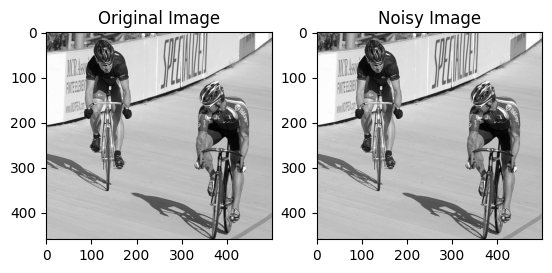

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def add_rayleigh_noise(image, scale=1.0):
    # Generate Rayleigh noise with the same shape as the input image
    rayleigh_noise = np.random.rayleigh(scale, size=image.shape)

    # Add the generated noise to the image
    noisy_image = image + rayleigh_noise

    # Clip values to ensure they are in the valid pixel intensity range [0, 255]
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype(np.uint8)

# Load an example image (replace 'your_image_path.jpg' with the actual image path)
image_path = '000283.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Set the Rayleigh noise scale (adjust as needed)
noise_scale = 1.0

# Add Rayleigh noise to the image
noisy_image = add_rayleigh_noise(original_image, scale=noise_scale)

# Display the original and noisy images
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')

# Save the noisy image
output_path = 'noisy_image.jpg'
cv2.imwrite(output_path, noisy_image)


plt.show()